In [1]:
import pandas as pd

In [5]:
customers = pd.read_csv('C:\\Users\\kunal\\Downloads\\mallcustomers.csv')
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60560.00,26264.721165,15000.0,41500.00,61500.0,78000.00,137000.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
customers.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.88,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.97,18.0,28.75,36.0,49.0,70.0
Income,200.0,NaN,NaN,NaN,60560.0,26264.72,15000.0,41500.0,61500.0,78000.0,137000.0
SpendingScore,200.0,NaN,NaN,NaN,50.2,25.82,1.0,34.75,50.0,73.0,99.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

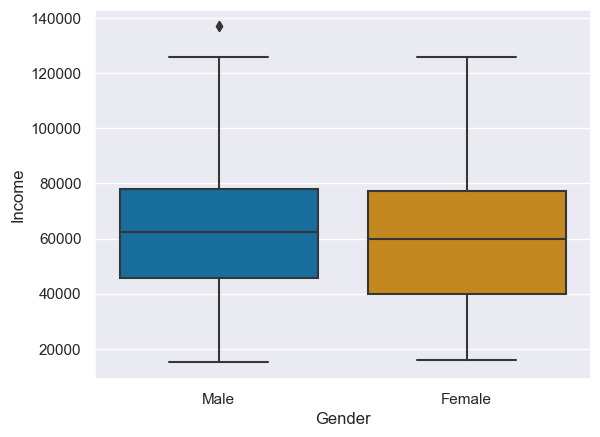

In [10]:
sns.boxplot(data=customers,
           x='Gender',
           y='Income',
           palette='colorblind');

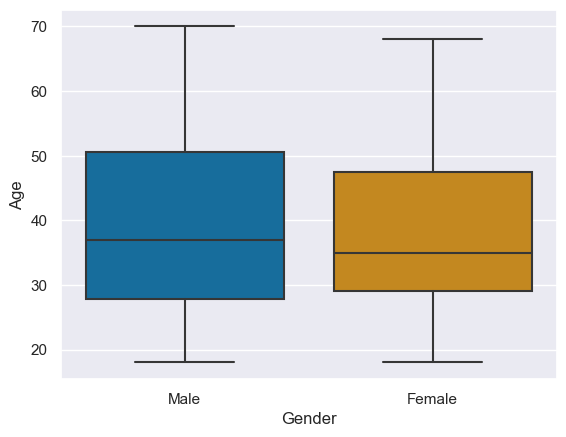

In [11]:
sns.boxplot(data=customers,
           x='Gender',
           y='Age',
           palette='colorblind');

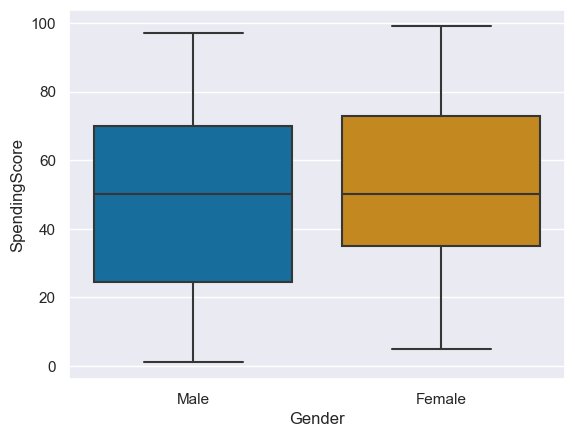

In [12]:
sns.boxplot(data=customers,
           x='Gender',
           y='SpendingScore',
           palette='colorblind');

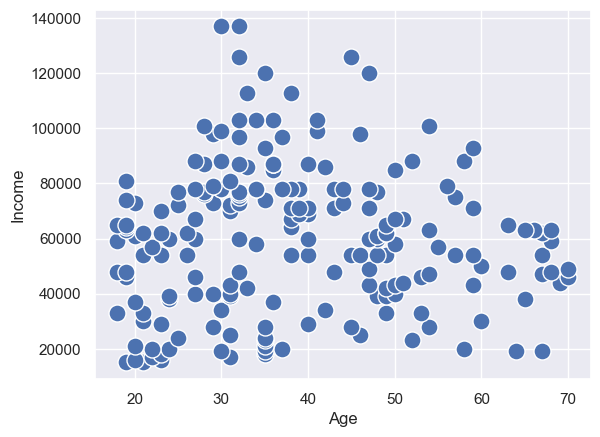

In [13]:
sns.scatterplot(data=customers,
               x='Age',
               y='Income',
               s=150);

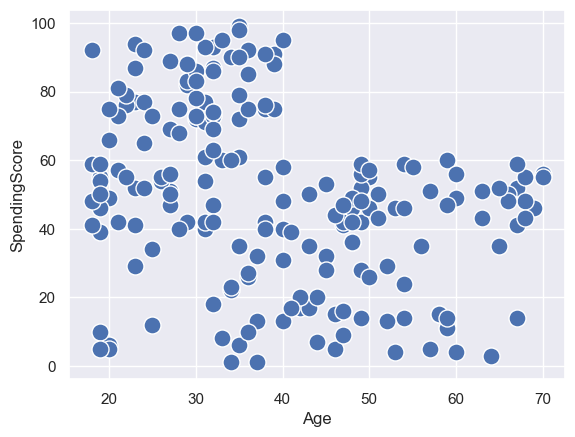

In [14]:
sns.scatterplot(data=customers,
               x='Age',
               y='SpendingScore',
               s=150);

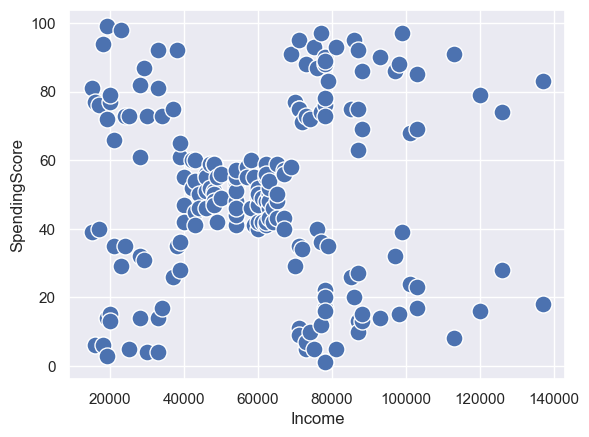

In [15]:
sns.scatterplot(data=customers,
               x='Income',
               y='SpendingScore',
               s=150);

In [16]:
customers[['Income', 'SpendingScore']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,200.0,60560.0,26264.72,15000.0,41500.00,61500.0,78000.0,137000.0
SpendingScore,200.0,50.2,25.82,1.0,34.75,50.0,73.0,99.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [19]:
customers_scaled = pd.DataFrame(customers_scaled, columns=['Income', 'SpendingScore'])

In [20]:
customers_scaled.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Income,200.0,-0.0,1.0,-2.0,-1.0,0.0,1.0,3.0
SpendingScore,200.0,-0.0,1.0,-2.0,-1.0,-0.0,1.0,2.0


# Create The Clusters

In [21]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters=3, n_init=25, random_state=1234)

In [23]:
km.fit(customers_scaled)

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=25, random_state=1234)

In [24]:
# to get cluster assignments
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [25]:
# this is Total Within Cluster Sum of Squares (WCSS) for the cluster
km.inertia_

157.7040081503594

#  Evaluate and Visualize the Clusters

In [26]:
# let's see how many instances are in each clusters
pd.Series(km.labels_).value_counts().sort_index()

0     38
1     39
2    123
dtype: int64

## Cluster Centriods

In [27]:
# let's see the cluster centroids
km.cluster_centers_

array([[ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275],
       [-0.62618966, -0.01439238]])

In [28]:
cluster_centers = pd.DataFrame(km.cluster_centers_,
                              columns=['Income', 'SpendingScore'])

cluster_centers

,Income,SpendingScore
0,1.009200,-1.225535
1,0.991583,1.239503
2,-0.626190,-0.014392


# Visualize to see quality of Clusters

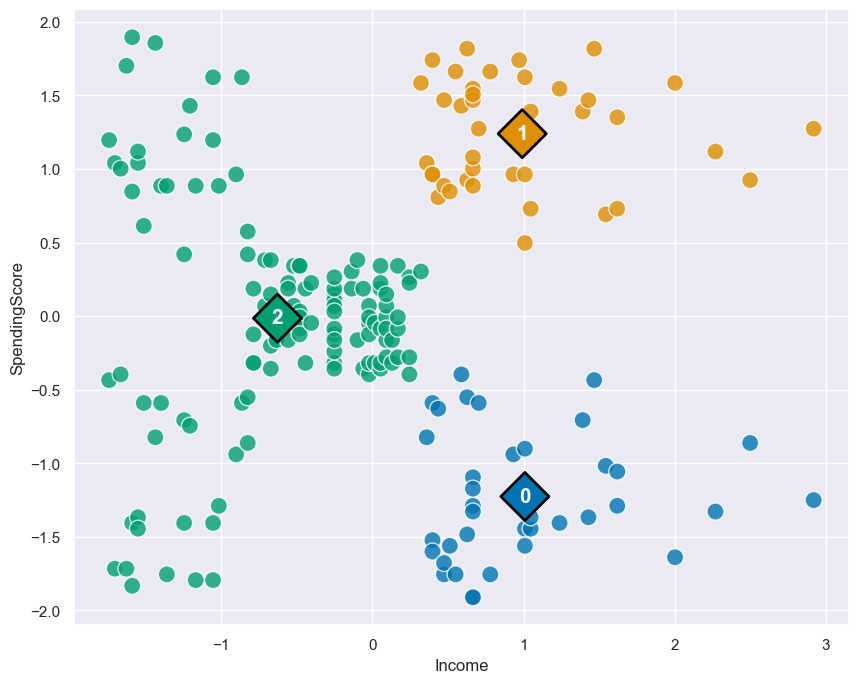

In [29]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

# Choosing the right number of clusters

## Approach 1 : The Within Cluster Sum of Squares (WCSS)

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

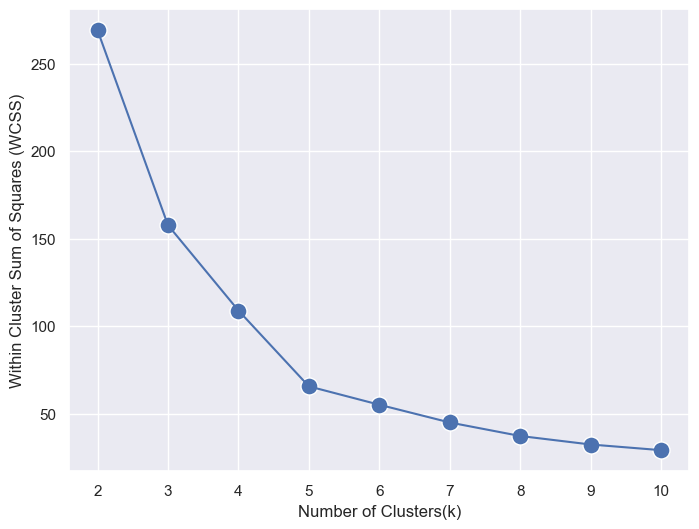

In [30]:
wcss = []

for k in range(2, 11):
    # build the model
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_) #get the wcss value of that particular model
    
# create as panda series
wcss_series = pd.Series(wcss, index=range(2, 11))

# Plot the values
plt.figure(figsize=(8,6))
ax = sns.lineplot(x=wcss_series.index, y=wcss_series)
ax = sns.scatterplot(x=wcss_series.index, y=wcss_series, s=150)

ax = ax.set(xlabel='Number of Clusters(k)',
           ylabel = 'Within Cluster Sum of Squares (WCSS)');

Based on the above chart, the elbow value is 5.

## Approach 2 : The Average Silhouette Score

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

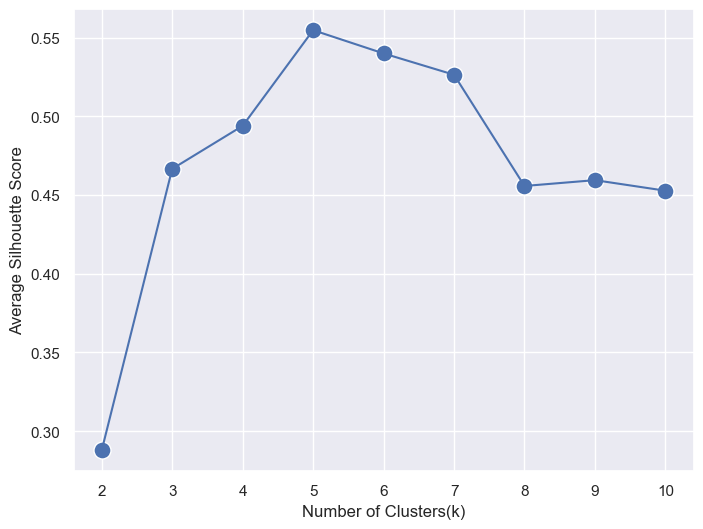

In [31]:
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    # build the model
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    silhouette_value = silhouette_score(customers_scaled, km.labels_) # get the shilouette score
    silhouette.append(silhouette_value)
    
# create as series
silhouette_series = pd.Series(silhouette, index=range(2, 11))

# Plot the values
plt.figure(figsize=(8,6))
ax = sns.lineplot(x=silhouette_series.index, y=silhouette_series)
ax = sns.scatterplot(x=silhouette_series.index, y=silhouette_series, s=150)

ax = ax.set(xlabel='Number of Clusters(k)',
           ylabel='Average Silhouette Score');

**Based on the chart above, the best value of Silhouette is 5 as the higher the value, the better it is.**

## Approach 3 : The Calinski Harabasz Score

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

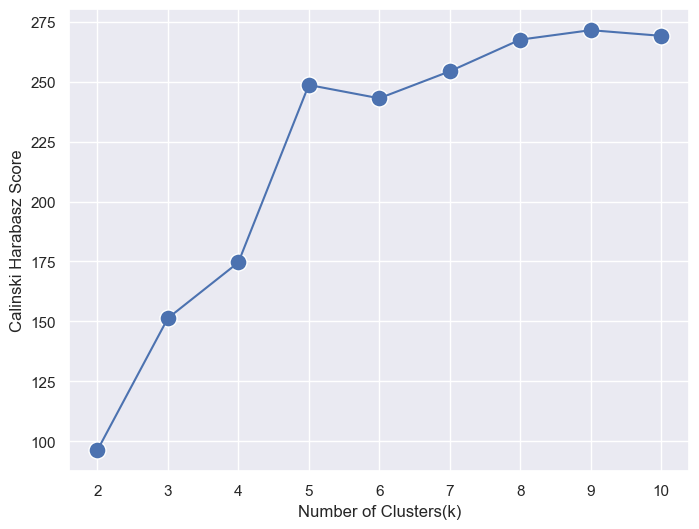

In [32]:
from sklearn.metrics import calinski_harabasz_score

calinski = []

for k in range(2, 11):
    # build the model
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    calinski_value = calinski_harabasz_score(customers_scaled, km.labels_)
    calinski.append(calinski_value)
    
# create into series
calinski_series = pd.Series(calinski, index=range(2, 11))

# Plot the values
plt.figure(figsize=(8, 6))
ax = sns.lineplot(x=calinski_series.index, y=calinski_series)
ax = sns.scatterplot(x=calinski_series.index, y=calinski_series, s=150)

ax = ax.set(xlabel = 'Number of Clusters(k)',
           ylabel='Calinski Harabasz Score');

**Based on the Calinski-Harabasz score, the optimal value for k is that which corresponds to either the highest score or the first abrupt elbow in the chart.**

#  Analyze and Interpret the Clusters

In [33]:
# we gonna use k=5 for our final model

km = KMeans(n_clusters=5, n_init=25, random_state=1234)
km.fit(customers_scaled)

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=25, random_state=1234)

In [34]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617]])

In [35]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=['Income', 'SpendingScore'])

cluster_centers

,Income,SpendingScore
0,-1.307519,-1.136965
1,0.991583,1.239503
2,-1.329545,1.132178
3,1.055003,-1.284439
4,-0.200913,-0.026456


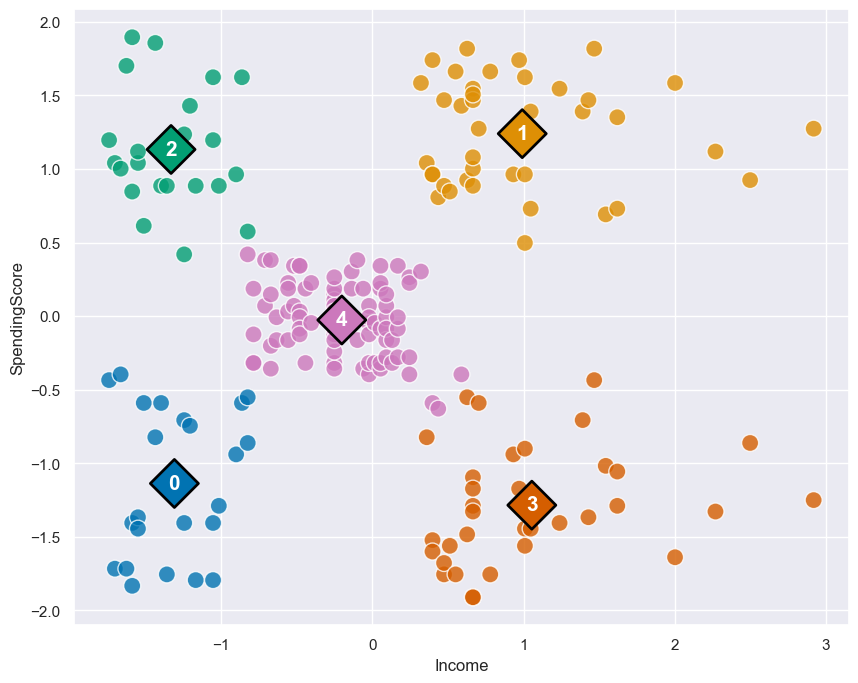

In [36]:
# Plot the value
plt.figure(figsize=(10, 8))

# Plot the clusters
ax = sns.scatterplot(data=customers_scaled,
                    x='Income',
                    y='SpendingScore',
                    hue=km.labels_,
                    palette='colorblind',
                    alpha=0.8,
                    s=150,
                    legend=False)

#Plot the Centroids
ax = sns.scatterplot(data=cluster_centers,
                    x='Income',
                    y='SpendingScore',
                    hue=cluster_centers.index,
                    palette='colorblind',
                    s=600,
                    marker='D',
                    ec='black',
                    legend=False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
    plt.text(x=cluster_centers.Income[i],
                y=cluster_centers.SpendingScore[i],
                s=i,
                horizontalalignment='center',
                verticalalignment='center',
                size=15,
                weight='bold',
                color='white');

In [37]:
# Add Cluster as a new column back to Original Dataset
customers['Cluster'] = km.labels_.tolist()

customers.head()

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,2
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,2
4,5,Female,31,17000,40,0


In [38]:
customers = pd.get_dummies(customers, columns=['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,2,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,2,1,0
4,5,31,17000,40,0,1,0
5,6,22,17000,76,2,1,0
6,7,35,18000,6,0,1,0
7,8,23,18000,94,2,1,0
8,9,64,19000,3,0,0,1
9,10,30,19000,72,2,1,0


In [39]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'
}).round(2)


Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

We can see that for Gender column based on summary statistics, about 56% are Female and 44% are Male.

In [40]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'
}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.54,0.46,32.0,79000.0,83.0
2,0.59,0.41,23.5,24500.0,77.0
3,0.46,0.54,42.0,85000.0,16.0
4,0.59,0.41,46.0,54000.0,50.0


We also see that the median age income and spending score values are 36, $61,500 and 50 respectively.

**Comparing the descriptive statistics for customers by cluster against the descriptive statistics for all customers provide some interesting insights.**

For example,

1. We see that the representation of women in clusters zero is higher than the average and the customers in cluster zero tend to be older, earn less and spend less than the average.

2. The customers in cluster one are more likely to be male, they tend to be older than the average, earn more than the average but spend less than the average customer.

3. The customers in cluster two mimic the gender distribution of the entire dataset. They are slightly younger than average, but earn and spend more than the average.

4. The gender distribution of customers in cluster three also mimics that of the entire dataset. However, they tend to be much younger and earn less than the average customer. Interestingly, they tend to spend more than the average customer.

5. Similar to cluster three, the gender distribution of customers in cluster four mimics data the overall dataset. However, they tend to be older than the average, earn a little less than the average, but have an average spending score.

6. In terms of a customer relations strategy, it would make sense to invest in increasing the spending of the high earning low spending customers in cluster one.

7. Secondly, it would make sense to keep the high earning, high spending customers in cluster two happy.

8. And thirdly, it would make sense to keep a watchful eye on the low earning high spending customers in cluster three.